<a href="https://colab.research.google.com/github/viveknaidu007/repo-35-DEEP-LEARNING-PROJECTS/blob/main/3-CIFAR-10-object-recogniting-using-resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
#upload the kaggle json file in the directory root

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"viveknaidu007","key":"98fdf53fb41ec5685557b2cfc5fadc4f"}'}

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:07<00:00, 72.9MB/s]
100% 715M/715M [00:07<00:00, 97.4MB/s]


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [7]:
#now we have to extarct zip file

from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extarcted')


dataset is extarcted


In [8]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [9]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.7 MB/s eta 0:00:00


In [10]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z' , mode='r')  #here r means read
archive.extractall()                 #for extarct in the specific path folder we can use this ##archive.extractall(path='/content/Training Data')
archive.close()

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
#now lets get into this
#we build nuerall netwrok and import preyrained model resnet

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [13]:
filenames = os.listdir('/content/train')

In [14]:
type(filenames)

list

In [15]:
len(filenames)

50000

In [16]:
print(filenames[0:5])  #we r just printing first 5 files
print(filenames[-5:])  #we r just printing last five files

['34151.png', '36909.png', '32141.png', '24716.png', '35596.png']
['48724.png', '39292.png', '19530.png', '5449.png', '39767.png']


In [17]:
#labels preprocessing

labels_df = pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
labels_df.shape

(50000, 2)

In [24]:
labels_df.value_counts()

id     label     
50000  automobile    1
1      frog          1
2      truck         1
3      truck         1
4      deer          1
                    ..
20     frog          1
21     deer          1
22     cat           1
23     frog          1
24     frog          1
Length: 50000, dtype: int64

In [25]:
#now
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [26]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [27]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [28]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [29]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

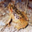

In [30]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

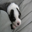

In [31]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [32]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [33]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [34]:
id_list = list(labels_df['id'])

In [35]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
#image processing



In [36]:
#converting images to numpy array

# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [37]:
type(data)

list

In [38]:
len(data)

50000

In [39]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape  #(R,G,B)
#(R=32,G=32,B=3)  #here th eimage willl respresent it like this form

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
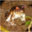

In [41]:
data[0]

In [42]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [43]:
type(X)

numpy.ndarray

In [44]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#train test split



In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [47]:
#now scaling the data
#the values range bertwen 0 to 255
#0 = 0 , 255 = 1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [48]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),   #(32,32,3) are (50000, 32, 32, 3) seee above codes of shape     #input layer
    keras.layers.Dense(64, activation='relu'),   #64 = 64 nuerons  ,#hidden layer
    keras.layers.Dense(num_of_classes, activation='softmax')  #no of target outputs = 10 ,  #output layer
])
#in output layer , if our output is like 0,1 we mostly use sigmoid
#or output more than 3 , we preferlly used softmax

In [51]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
#

In [52]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 2.0205 - acc: 0.2630 - val_loss: 1.9441 - val_acc: 0.2878
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8842 - acc: 0.3226 - val_loss: 1.8336 - val_acc: 0.3422
Epoch 3/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8438 - acc: 0.3392 - val_loss: 1.8126 - val_acc: 0.3400
Epoch 4/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8291 - acc: 0.3412 - val_loss: 1.8227 - val_acc: 0.3375
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8067 - acc: 0.3518 - val_loss: 1.8537 - val_acc: 0.3203
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7829 - acc: 0.3588 - val_loss: 1.7664 - val_acc: 0.3722
Epoch 7/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.7698 - acc: 0.3654 - val_loss: 1.7787 - val_acc: 0.3568
Epoch 8/10
1125/1125 [==============================] - 5s 5ms

In [ ]:
#now we r using now  pretrained ResNEt50 for boosting for our model

In [54]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [55]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))  #256,256,3 are
convolutional_base.summary()

#imagenet is like images are already trained and it will predict the weights , it already trained on images like dog,cat,frogs,trucks, etc
#include_top is like it will import this resnet model in the input layer , we r adding our custome input layer
#256 width , 256 height ,3 RGB for input shape understanding

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [56]:
#now we r adding our won l ayers
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [57]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
  history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)
  #7minutes for 1st eppoch it took me

Epoch 1/10
1125/1125 [==============================] - ETA: 0s - loss: 2.2107 - acc: 0.2024

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()